In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_rectangles(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    image=cv2.medianBlur(image,3)
    image=cv2.medianBlur(image,3)
    image=cv2.medianBlur(image,5)
    original_image = image.copy()
    
    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Step 4: Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Step 5: Approximate contours to polygons and filter rectangles
    rectangles = []
    bounding_boxes = []
    for cnt in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        
        # Check if the approximated contour has 4 points
        if len(approx) == 4:
            # Further check if the shape is a rectangle
            if cv2.isContourConvex(approx):
                rectangles.append(approx)
                x, y, w, h = cv2.boundingRect(approx)
                bounding_boxes.append((x, y, w, h))
    
    return bounding_boxes, original_image

def process_bounding_boxes(image, bounding_boxes):
    results = []
    for i, bbox in enumerate(bounding_boxes):
        x, y, w, h = bbox
        roi = image[y:y+h, x:x+w]
        
        # Example computation: calculating the mean color inside the bounding box
        mean_color = cv2.mean(roi)[:3]  # Get only BGR values, ignore alpha if present
        results.append((bbox, mean_color))
        
        # Draw the bounding box
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Draw the mean color text
        # text = f"Mean BGR: ({int(mean_color[0])}, {int(mean_color[1])}, {int(mean_color[2])})"
        # cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return image, results

def show_image(image):
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()  

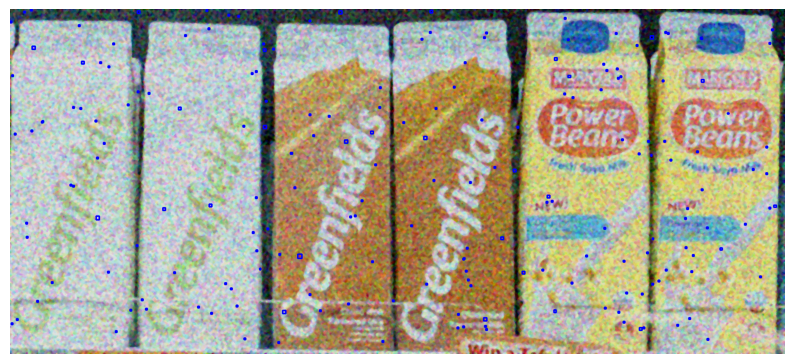

In [2]:
# Example usage
image_path = './dataset/scenes/scene9.png'
bounding_boxes, original_image = detect_rectangles(image_path)
annotated_image, results = process_bounding_boxes(original_image, bounding_boxes)

# Show the result using matplotlib
show_image(annotated_image)
